In [1]:
# Import modules
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('data/diabetic_data.csv')
data1 = pd.read_csv('data/IDs_mapping.csv')

In [3]:
print(data.shape)
data.head()

(101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [5]:
# replace ? to NaN (missing value)
data= data.replace("?", np.NaN)

In [6]:
#columns contain missing value
data.columns[data.isna().any()].tolist()

['race',
 'weight',
 'payer_code',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3']

In [7]:
#drop weight column
data = data.drop('weight', axis=1)

In [8]:
#split admission id into multiple columns
data2 = data1[0:8]
data3 = data1[10:40]
data4 = data1[42:67]
data3 = data3.rename(index=str, columns={"admission_type_id":"discharge_disposition_id"})
data4 = data4.rename(index=str, columns={"admission_type_id":"admission_source_id"})
data2.admission_type_id = data2.admission_type_id.astype(int)
data3.discharge_disposition_id = data3.discharge_disposition_id.astype(int)
data4.admission_source_id = data4.admission_source_id.astype(int)

/Users/jasonwang/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [9]:
#merge two data and rename the columns
new_data = pd.merge(data, data2, on='admission_type_id', how='inner')
new_data = pd.merge(new_data, data3, on='discharge_disposition_id', how='inner')
new_data = pd.merge(new_data, data4, on='admission_source_id', how='inner')
new_data.rename(columns={'description_x':'admission_type','description_y':'discharge_disposition','description':'admission_source'}, inplace=True)
new_data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type,discharge_disposition,admission_source
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,NaN,...,No,No,No,No,No,No,NO,NaN,Not Mapped,Physician Referral
1,1968528,720936,Caucasian,Female,[70-80),6,25,1,10,NaN,...,No,No,No,No,Ch,Yes,>30,NaN,Not Mapped,Physician Referral
2,2223336,558360,AfricanAmerican,Female,[60-70),6,25,1,9,NaN,...,No,No,No,No,No,No,NO,NaN,Not Mapped,Physician Referral
3,2298006,2519748,Caucasian,Male,[60-70),6,25,1,4,NaN,...,No,No,No,No,Ch,Yes,NO,NaN,Not Mapped,Physician Referral
4,2356308,608841,AfricanAmerican,Female,[50-60),6,25,1,1,NaN,...,No,No,No,No,No,Yes,>30,NaN,Not Mapped,Physician Referral
5,2363592,1059561,Caucasian,Female,[50-60),6,25,1,1,NaN,...,No,No,No,No,No,Yes,NO,NaN,Not Mapped,Physician Referral
6,2398146,8147493,Caucasian,Male,[60-70),6,25,1,1,NaN,...,No,No,No,No,No,Yes,NO,NaN,Not Mapped,Physician Referral
7,2422806,3377124,Caucasian,Male,[40-50),6,25,1,14,NaN,...,No,No,No,No,Ch,Yes,>30,NaN,Not Mapped,Physician Referral
8,2466036,4311585,Caucasian,Male,[60-70),6,25,1,10,NaN,...,No,No,No,No,Ch,Yes,>30,NaN,Not Mapped,Physician Referral
9,2473188,981198,Caucasian,Female,[60-70),6,25,1,5,NaN,...,No,No,No,No,No,Yes,>30,NaN,Not Mapped,Physician Referral


In [10]:
new_data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'admission_type', 'discharge_disposition', 'admission_source'],
      dtype='object')

In [11]:
#create a new column where readmitted day is less than 30 day
new_data['readmitin30days'] = np.where(new_data['readmitted'] == '<30', 1, 0)
new_data.readmitin30days.value_counts()

0    90409
1    11357
Name: readmitin30days, dtype: int64

In [12]:
###EDA###

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64


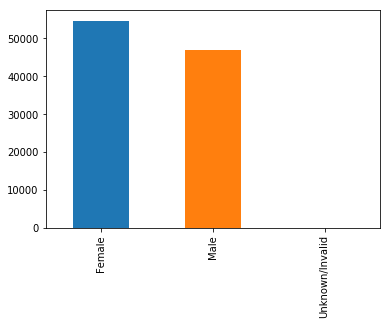

In [13]:
#gender count
print(new_data.gender.value_counts())
new_data.gender.value_counts().plot(kind='bar')

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


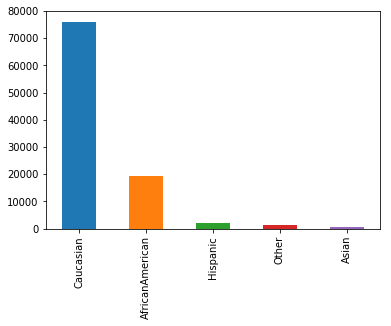

In [14]:
#race count
print(new_data.race.value_counts())
new_data.race.value_counts().plot(kind='bar')

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64


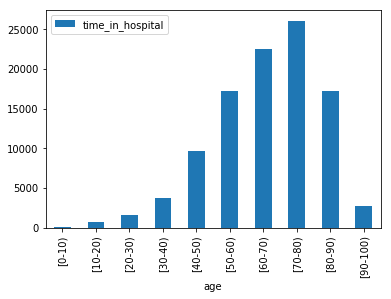

In [15]:
#age count
print(new_data.age.value_counts())
new_data[['age','time_in_hospital']].groupby(['age']).count().plot(kind='bar')

          time_in_hospital
age                       
[0-10)            2.546584
[10-20)           3.191027
[20-30)           3.564876
[30-40)           3.799735
[40-50)           4.039649
[50-60)           4.125753
[60-70)           4.382244
[70-80)           4.590878
[80-90)           4.808629
[90-100)          4.755818


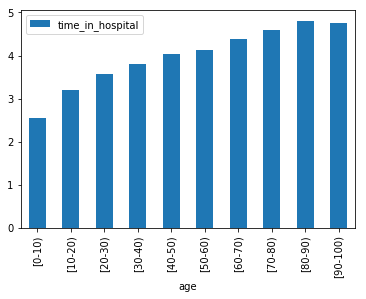

In [16]:
#average time in hospital group by age
print(new_data[['age','time_in_hospital']].groupby(['age']).mean())
ave_age_time = new_data[['age','time_in_hospital']].groupby(['age']).mean()
ave_age_time.plot(kind='bar')

                time_in_hospital
admission_type                  
Elective                4.320473
Emergency               4.378274
Newborn                 3.200000
Not Available           3.947126
Not Mapped              3.062500
Trauma Center           4.857143
Urgent                  4.610714


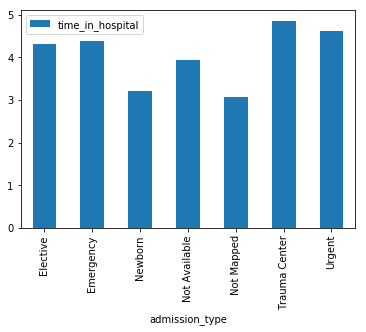

In [17]:
#average time in hospital group by admission type
print(new_data[['admission_type','time_in_hospital']].groupby(['admission_type']).mean())
ave_adm_time = new_data[['admission_type','time_in_hospital']].groupby(['admission_type']).mean()
ave_adm_time.plot(kind='bar')

                 time_in_hospital
readmitin30days                  
0                        4.349224
1                        4.768249


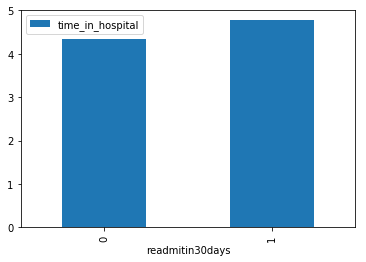

In [18]:
#average time in hospital group by readmission with 30 day
print(new_data[['readmitin30days','time_in_hospital']].groupby(['readmitin30days']).mean())
ave_adm_time = new_data[['readmitin30days','time_in_hospital']].groupby(['readmitin30days']).mean()
ave_adm_time.plot(kind='bar')

                                                    time_in_hospital
discharge_disposition                                               
Admitted as an inpatient to this hospital                   4.619048
Discharged to home                                          3.700634
Discharged/transferred to ICF                               5.355828
Discharged/transferred to SNF                               5.786656
Discharged/transferred to a federal health care...          7.800000
Discharged/transferred to a long term care hosp...          7.058252
Discharged/transferred to a nursing facility ce...          3.937500
Discharged/transferred to another rehab fac inc...          5.789262
Discharged/transferred to another short term ho...          3.862782
Discharged/transferred to another type of inpat...          5.651182
Discharged/transferred to home under care of Ho...          6.842593
Discharged/transferred to home with home health...          5.436831
Discharged/transferred within this

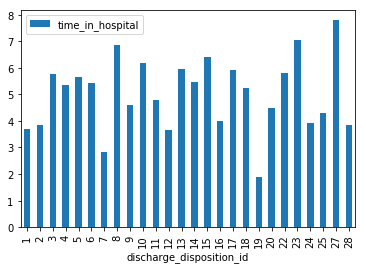

In [19]:
#average time in hospital by discharge disposition
print(new_data[['discharge_disposition','time_in_hospital']].groupby('discharge_disposition',sort=True).mean())
ave_dis_time=new_data[['discharge_disposition_id','time_in_hospital']].groupby('discharge_disposition_id',sort=True).mean()
ave_dis_time.plot(kind='bar')

                                                    time_in_hospital
admission_source                                                    
 Court/Law Enforcement                                      5.562500
 Emergency Room                                             4.387519
 Extramural Birth                                           3.000000
 Not Available                                              3.416000
 Not Mapped                                                 4.577640
 Physician Referral                                         4.257805
 Sick Baby                                                  3.000000
 Transfer from Ambulatory Surgery Center                    6.000000
 Transfer from a Skilled Nursing Facility (SNF)             5.829240
 Transfer from another health care facility                 4.426237
 Transfer from critial access hospital                      4.375000
 Transfer from hospital inpt/same fac reslt in ...         10.000000
Clinic Referral                   

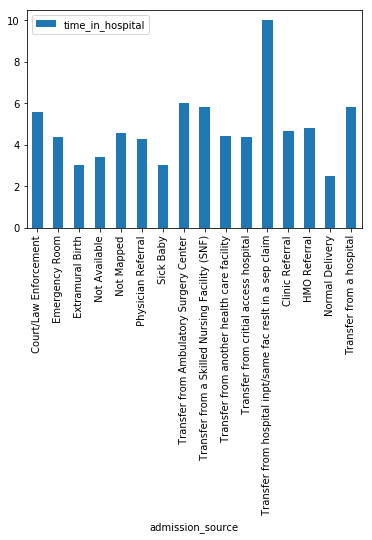

In [20]:
#average time in hospital by admission_source
print(new_data[['admission_source','time_in_hospital']].groupby('admission_source',sort=True).mean())
ave_adms_time = new_data[['admission_source','time_in_hospital']].groupby('admission_source',sort=True).mean()
ave_adms_time.plot(kind='bar')

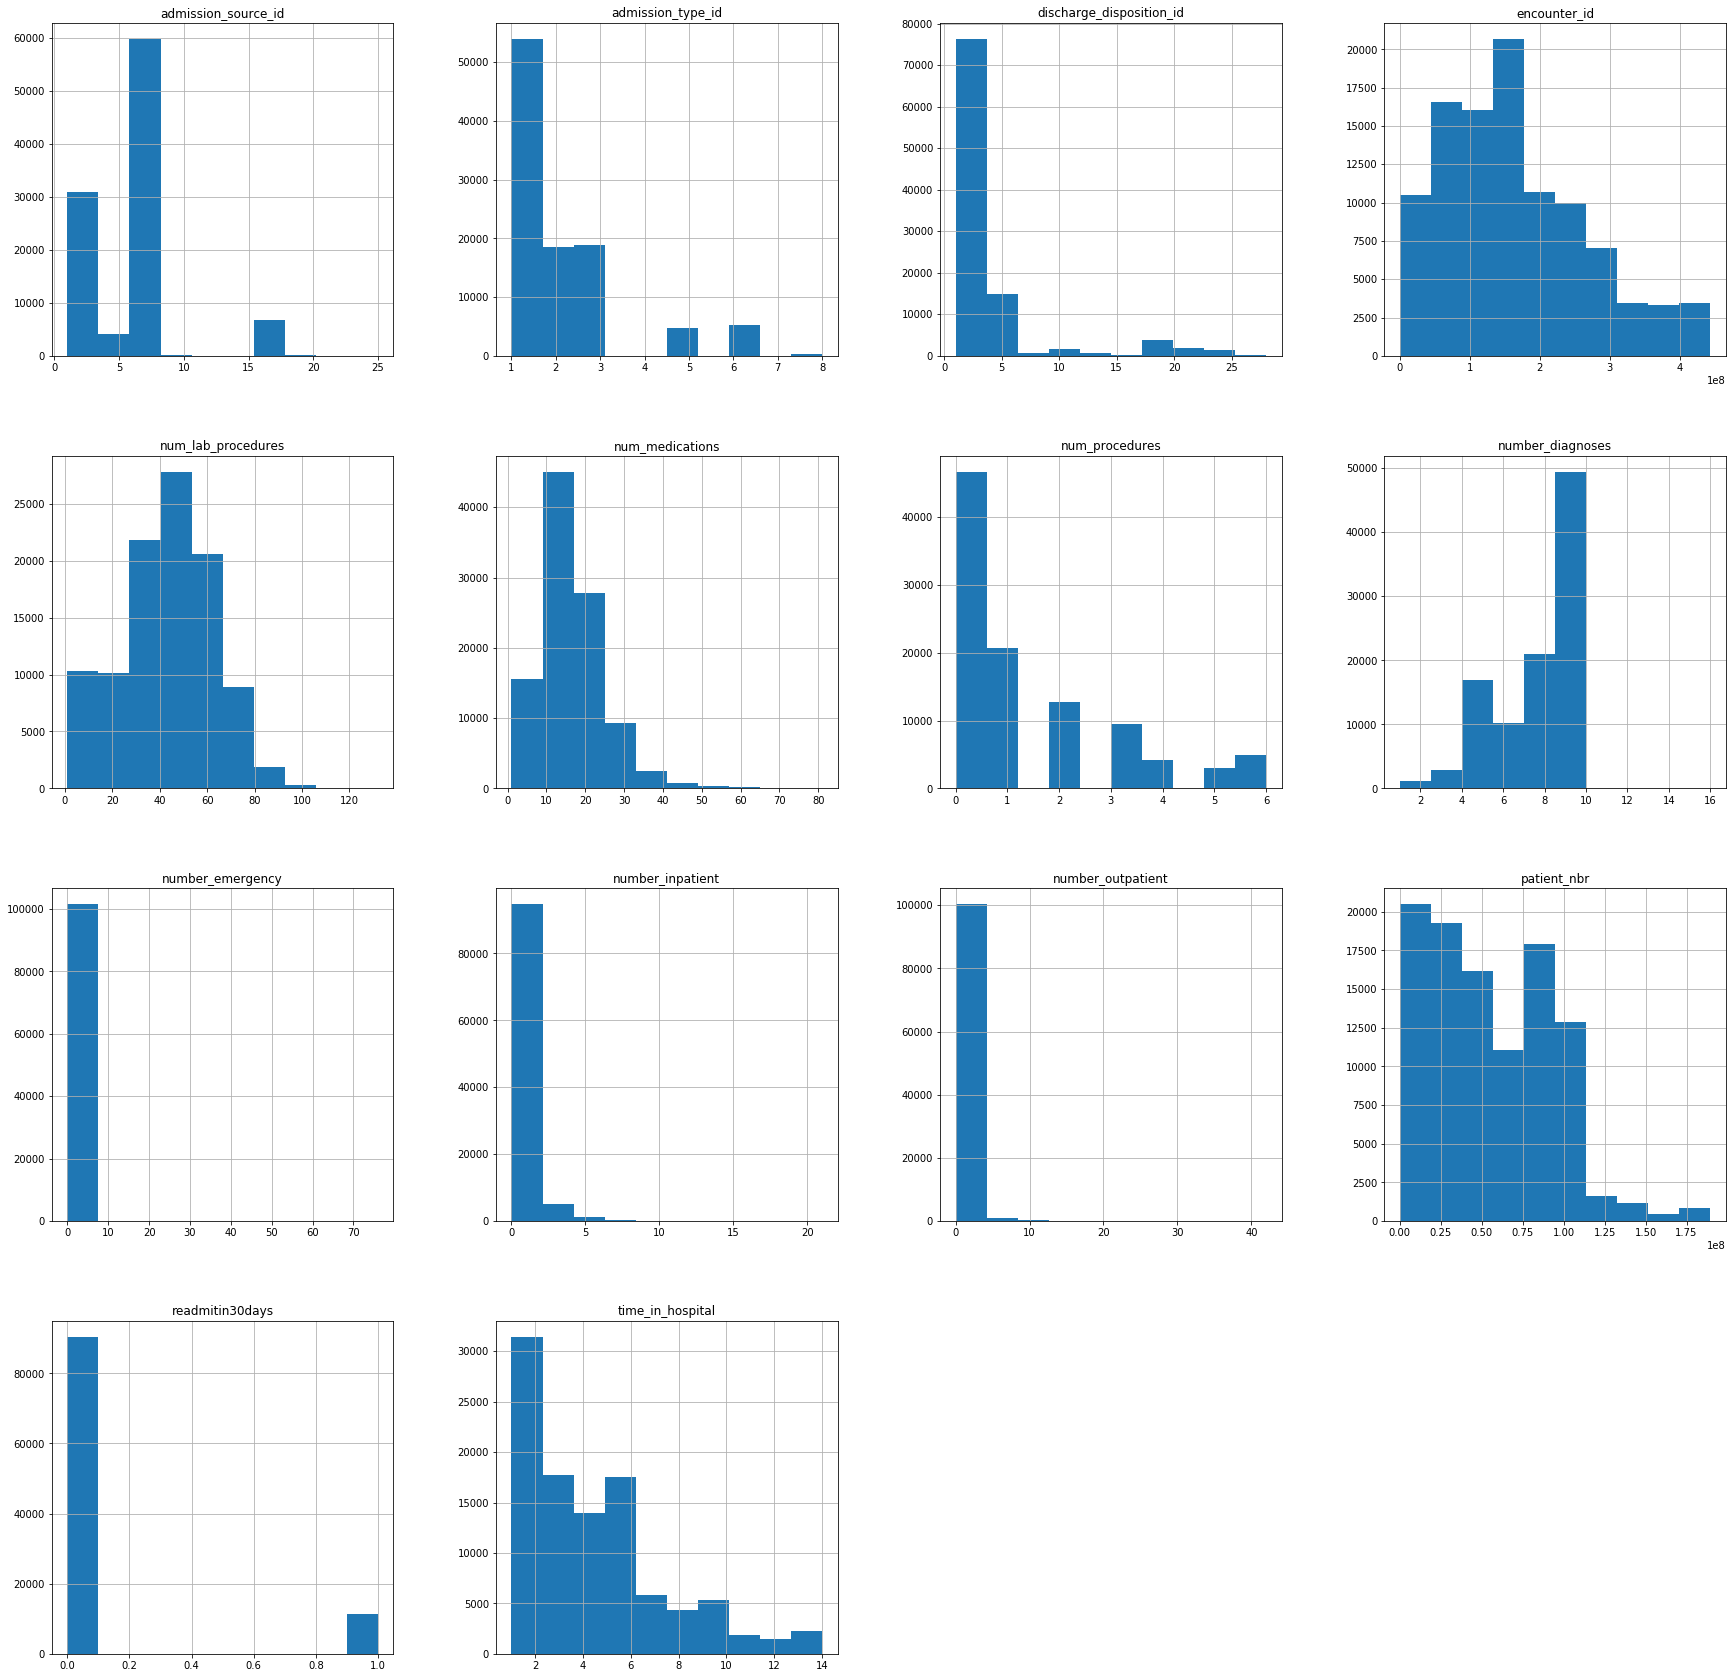

In [21]:
new_data.hist(figsize=(30,30))
plt.show()

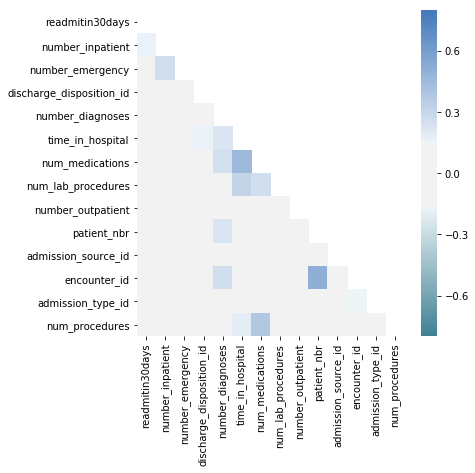

In [22]:
import seaborn as sns

# Calculate correlations
corr = new_data.corr()

# Cluster by max
corr = corr.sort_values(by=['readmitin30days'], ascending=False, axis =0)
corr = corr.sort_values(by=['readmitin30days'], ascending=False, axis =1)

# Make it triangular
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
cmap = sns.diverging_palette(220, 250, sep=50, as_cmap=True)
sns.heatmap(ax=ax, data=corr, mask=mask, cmap=cmap, vmin=-0.8, vmax=0.8)

In [23]:
### Dealing with missing data

In [24]:
#create a column to determine if patient has diabetes or not
feature = ['diag_1','diag_2','diag_3']
for i in feature:
    new_data[i] = new_data[i].fillna('0')
import re
new_data['diabetic'] = 0
for i in range(len(new_data)):
   if(re.match(r"250.",new_data.loc[i,"diag_1"])):
       new_data.loc[i,"diabetic"] = 1
   else:
       new_data.loc[i,"diabetic"] = 0

In [25]:
# sort diagnosis

feature = ['diag_1','diag_2','diag_3']
for i in feature:
    new_data[i] = new_data[i].fillna('0')
def detection(v):
    if v[0]== "V" or v[0] == 'E':
        v = '9999'
        return v
    else:
        return v
for e in feature:
    for i in new_data[e].index:
        new_data[e].at[i] = detection(new_data[e].at[i])

#total_new = new_data.isna().sum().sort_values(ascending=False)
#total_new
    
#d1 = pd.DataFrame(new_data.diag_1.apply(lambda v: first_letter(v)), dtype = 'float')
#d2 = pd.DataFrame(new_data.diag_1.apply(lambda v: first_letter))

In [26]:
#Change diagnoses type to float
new_data.diag_1 = new_data.diag_1.astype(float)
new_data.diag_2 = new_data.diag_2.astype(float)
new_data.diag_3 = new_data.diag_3.astype(float)
new_data.diag_1.dtypes

dtype('float64')

In [27]:
#create a description columns of diagnoses

def catagory(v):
    if 0.0 <= v < 1.0:
        return 'No Diagnosis'
    elif 1.0<= v < 140.0:
        return 'infectious and parasitic diseases'
    elif 140.0 <= v < 240.0:
        return 'neoplasms'
    elif 240.0 <= v < 280.0:
        return 'endocrine, nutritional and metabolic diseases, and immunity disorders'
    elif 280.0 <= v < 290.0:
        return 'diseases of the blood and blood-forming organs'
    elif 290.0 <= v < 320.0:
        return 'mental disorders'
    elif 320.0 <= v < 390.0:
        return 'diseases of the nervous system and sense organs'
    elif 390.0 <= v < 460.0:
        return 'diseases of the circulatory system'
    elif 460.0 <= v < 520.0:
        return 'diseases of the respiratory system'
    elif 520.0 <= v < 580.0:
        return 'diseases of the digestive system'
    elif 580.0 <= v < 630.0:
        return 'diseases of the genitourinary system'
    elif 630.0 <= v < 680.0:
        return 'complications of pregnancy, childbirth, and the puerperium'
    elif 680.0 <= v < 710.0:
        return 'diseases of the skin and subcutaneous tissue'
    elif 710.0 <= v < 740.0:
        return 'diseases of the musculoskeletal system and connective tissue'
    elif 740.0 <= v < 760.0:
        return 'congenital anomalies'
    elif 760.0 <= v < 780.0:
        return 'certain conditions originating in the perinatal period'
    elif 780.0 <= v < 800.0:
        return 'symptoms, signs, and ill-defined conditions'
    elif 800.0 <= v < 999.0:
        return 'injury and poisoning'
    else:
        return 'external causes of injury and supplemental classification'

new_data['f_diag'] = new_data.diag_1.apply(lambda v: catagory(v))
new_data['s_diag'] = new_data.diag_2.apply(lambda v: catagory(v))
new_data['t_diag'] = new_data.diag_3.apply(lambda v: catagory(v))
new_data['f_diag'].head()

0    endocrine, nutritional and metabolic diseases,...
1                   diseases of the circulatory system
2                                 injury and poisoning
3                   diseases of the respiratory system
4    endocrine, nutritional and metabolic diseases,...
Name: f_diag, dtype: object

In [28]:
# create new columns for payercode
new_data['self_pay'] = list(map(lambda x: 1 if x == "SP" else 0, new_data['payer_code']))
new_data['medicaid/medicare'] = list(map(lambda x: 1 if (x == "MD" or x == "MC") else 0, new_data['payer_code']))
new_data['coverByInsurance'] = list(map(lambda x: 1 if (x in ['HM','BC','CP', 'UN', 'CM', 'OG', 'PO', 'DM', 'CH', 'WC', 'OT', 'MP','SI', 'FR']) else 0, new_data['payer_code']))

In [29]:
# make missing value to "other" value in "race" column
new_data['race'] = new_data['race'].replace(np.nan, 'Other')

In [30]:
new_data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'admission_type', 'discharge_disposition', 'admission_source',
       'readmitin30days', 'diabe

In [31]:
#remove columns
rmlist = ['diag_1','diag_2','diag_3','readmitted', 'admission_type', 'admission_source','discharge_disposition']
new_data = new_data.drop(rmlist, axis = 1)

In [32]:
new_data.to_csv('data/new_data.csv')